# Recap about the fundamentals of Deep Learning

📆 What's on the agenda for this recap?

- ***Intro***: How to read the docs
- ***Part 1***: Tensorflow de-mystified (👨🏻‍🏫 Teacher-led)
- ***Part 2***: Boston Housing Challenge (👩‍🎓 Student-led)

## Intro: How to read the docs?

✅ [Tensorflow.org](https://www.tensorflow.org/overview) provides you with two main pages to refer to:
- [Tutorial](https://www.tensorflow.org/tutorials)
- [Guide](https://www.tensorflow.org/guide)
- ***These should be your go-to pages***. You can even run `Colab-Notebooks` of these tutorials

&nbsp;

✅ TensorFlow [API docs](https://www.tensorflow.org/api_docs/python/tf/) contains only essential elements and advanced notions
- It pops up in Google Search in priority
- [Sometimes](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential), it can give you references to related Tutorials or Guides
- ***Use it as THE single source of truth***

&nbsp;

❌ [Keras.io](https://keras.io/about/) is somewhat redundant with the TensorFlow documentation
- It contains nice tutorials and examples but...
- ...use it only you don't find what you need on `Tensorflow.Keras`'s website
- ***Don't use it for the docs***

## Part I - Tensorflow demystified 
_(🧑🏻‍🏫 Teacher-led)_

👉 Goal: Using Tensorflow, create a dummy dataset and fit a dummy model with it

### (1) Tensors?

📚 [Online Guide](https://www.tensorflow.org/guide/tensor)

In [1]:
# It's OK to import everything for notebook based experimentation!
import tensorflow as tf
from tensorflow import keras
import numpy as np

2022-05-16 12:22:24.142193: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-16 12:22:24.142371: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Tensors are wrappers around numpy objects

X = tf.constant([[1., 1., 1.],
                 [1., 1., 1.],
                 [1., 1., 1.]])
X

2022-05-16 12:22:28.904609: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-16 12:22:28.904827: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-16 12:22:28.905013: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-O26C6N05): /proc/driver/nvidia/version does not exist
2022-05-16 12:22:28.910053: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [3]:
tf.ones((3,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [4]:
x = X.numpy()
x

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [5]:
# Tensors have a shape
X.shape

TensorShape([3, 3])

In [6]:
# Tensors can be initialized from Numpy objects
tf.constant(x)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [7]:
# They can be manipulated with syntax that is similar to Numpy
tf.add(X,X)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]], dtype=float32)>

In [8]:
# Conversely, Numpy also accept Tensor elements!
np.add(X,X)

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]], dtype=float32)

In [9]:
# Example of a custom MSE loss function using Tensors

def loss(y_true, y_pred):
    err = y_true - y_pred
    return tf.reduce_mean(tf.square(err))

y_true = tf.ones((10,3))
y_pred = tf.ones((10,3)) + 0.1 * tf.random.normal((10,3))

loss(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.009706751>

#### Other Tensors?

**Sparse Tensors**
<img src="https://github.com/lewagon/data-images/blob/master/DL/sparse_tensors.png?raw=true">

In [10]:
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
sparse_tensor.shape

TensorShape([3, 4])

**Ragged Tensors**
<img src="https://raw.githubusercontent.com/lewagon/data-images/master/DL/ragged_tensors.png">

In [13]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]

ragged_tensor = tf.ragged.constant(ragged_list)
ragged_tensor.shape

TensorShape([4, None])

### (2) Build a neural network with `Sequential API`

👉 Let's generate 10 random observations `X` of 3 features each, and a unidimensional target `y` 

In [14]:
# Let's generate 100 observations of with 10 features for each of them
X = tf.random.uniform((100,10))

In [15]:
# And create our dummy target as simply the mean of each observation
y = tf.reduce_mean(X, axis=1)
y.shape

TensorShape([100])

👉 Let's build a simple dense model that "works"

In [16]:
from tensorflow.keras import Sequential, layers

In [17]:
# Usual syntax

model = Sequential()
model.add(layers.Dense(30, input_dim=10, activation='relu'))
#model.add(layers.Dense(30, input_shape=(10,), activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                330       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Equivalent
model = Sequential([
    layers.Dense(30, input_shape=(10, ), activation='relu'),
    layers.Dense(1),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 30)                330       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [19]:
# What if we don't specify input_dim?
model = Sequential()
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(1))

In [20]:
try:
    model.summary()
    
except ValueError as e:
    print(e)

This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.


In [22]:
# One can still access all the layers individually
model.layers

In [23]:
# And call the layer with a "tensor" as input
x1 = model.layers[0](X)

# x1 is our activation from layer 1, with random (initial) weights
x1.shape

TensorShape([100, 30])

In [24]:
# x2 is our output
x2 = model.layers[1](x1)
x2.shape

TensorShape([100, 1])

### (3) Keras Input layer

You will often encounter this in the docs:
```python
keras.Input(shape=(10,))
```
Instead of passing 100 **real** observations to your layers, simply pass a `keras.Input` of `None` observations of similar shape (10,).  

It is used for computation optimization purposes (memory pre-allocation and network graphs for parallelization) 

In [25]:
inputs = keras.Input(shape=(10,))
inputs

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'input_1')>

In [26]:
model.layers[0](inputs)

<KerasTensor: shape=(None, 30) dtype=float32 (created by layer 'dense_4')>

In [27]:
x = model.layers[0](inputs) # Input layer
x = layers.Dense(30, activation='relu')(inputs) # First layer output
x = layers.Dense(20, activation='relu')(x) # Second layer output
x = layers.Dense(10, activation='relu')(x) # Third layer output
outputs = layers.Dense(1)(x)               # Final layer output

outputs.shape

TensorShape([None, 1])

In [28]:
# Keras allows you to build a model from an input and output layer
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_6 (Dense)             (None, 30)                330       
                                                                 
 dense_7 (Dense)             (None, 20)                620       
                                                                 
 dense_8 (Dense)             (None, 10)                210       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,171
Trainable params: 1,171
Non-trainable params: 0
_________________________________________________________________


☝️ This way of building models is called Keras [Functional API](https://www.tensorflow.org/guide/keras/functional)
- as opposed to [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential): `model.add(...)`
- It is mandatory for complex (non-sequential) architecture...
- Used everywhere in the docs

## Part II - Boston Housing Challenge 
(👩‍🎓Student-led)

### (1) Data

`Tensorflow.Keras` provides `Toy Datasets` that can be found <a href="https://www.tensorflow.org/api_docs/python/tf/keras/datasets">here</a>

Let's load the **`Boston Housing`** dataset.

In [29]:
from tensorflow.keras import datasets

(X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()

X_train.shape

65536/57026 [==================================] - 0s 1us/step


(404, 13)

❓ Normalize your data (by the mean of the train set for instance)

In [32]:
mu = X_train.mean(axis=0)

In [35]:
mu

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [36]:
X_train_norm = X_train/mu
X_test_norm = X_test/mu

### (2) Declare the general architecture of your model



❓ Import Keras and declare a Sequential model

In [39]:
from tensorflow.keras import models, layers

In [40]:
model = models.Sequential()

❓ Add a Dense layer with 50 neurons and the `relu` activation function. Do not forget to specify your `input_dim` for the first layer.

In [41]:
X_train.shape[1]

13

In [42]:
model.add(layers.Dense(50, activation='relu', input_dim=X_train.shape[1]))

❓ Add a second fully connected layer, with 20 neurons and the `relu` activation function.

In [43]:
model.add(layers.Dense(20, activation='relu'))

❓ Add a last layer that suits your regression task

In [47]:
y_train.shape

(404,)

In [48]:
model.add(layers.Dense(1, activation='linear'))

❓ Check the number of parameters of your model.

Re-count them manually to make sure you understood the numbers of parameters involved in each layer of your Dense Neural Network

In [49]:
(13*50 + 50) + (50*20 + 20) + (20*1 + 1)

1741

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                700       
                                                                 
 dense_11 (Dense)            (None, 20)                1020      
                                                                 
 dense_12 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,741
Trainable params: 1,741
Non-trainable params: 0
_________________________________________________________________


### (3) Define how your model is trained
 


❓ Compile the model with the `adam` `optimizer` and the `mse` `loss`

In [51]:
model.compile(loss='mse', optimizer='adam')

❓Run the model on this random data; don't forget to select a number of `epochs` and a `batch_size`. Store the returned result in `history`.

In [52]:
history = model.fit(X_train_norm, y_train, batch_size=16, epochs=30)

Epoch 1/30
26/26 [==============================] - 1s 4ms/step - loss: 546.8834
Epoch 2/30
26/26 [==============================] - 0s 3ms/step - loss: 427.8946
Epoch 3/30
26/26 [==============================] - 0s 3ms/step - loss: 273.9235
Epoch 4/30
26/26 [==============================] - 0s 3ms/step - loss: 156.0971
Epoch 5/30
26/26 [==============================] - 0s 5ms/step - loss: 112.3090
Epoch 6/30
26/26 [==============================] - 0s 3ms/step - loss: 90.9239
Epoch 7/30
26/26 [==============================] - 0s 3ms/step - loss: 78.8736
Epoch 8/30
26/26 [==============================] - 0s 3ms/step - loss: 70.7033
Epoch 9/30
26/26 [==============================] - 0s 3ms/step - loss: 66.9041
Epoch 10/30
26/26 [==============================] - 0s 3ms/step - loss: 64.3492
Epoch 11/30
26/26 [==============================] - 0s 3ms/step - loss: 62.0908
Epoch 12/30
26/26 [==============================] - 0s 3ms/step - loss: 59.8427
Epoch 13/30
26/26 [=============

❓ Plot the model convergence

In [53]:
import matplotlib.pyplot as plt

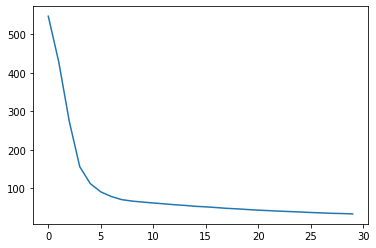

In [55]:
plt.plot(history.history['loss']);

❓ Write an entire model with its compilation within an `init_model` function

In [56]:
def init_model(X):
    model = models.Sequential()
    
    model.add(layers.Dense(50, input_dim=X_train.shape[1], activation='relu'))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(loss='mse', optimizer='adam')
    
    return model

You are advised to systematically rebuild a model (with an init function) before fitting some data in order to re-initialize the model's parameters.

The model you just wrote is suited for regression tasks.

What if we want to perform a binary classification task?

❓ Write another `init_model_2` function in which you will change:
* the last layer of the architecture 
* and the compilation method

used in a binary class classification problem.

In [57]:
def init_model2(X):
    model = models.Sequential()
    
    model.add(layers.Dense(50, input_dim=X_train.shape[1], activation='relu'))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam')
    
    return model

❓ Write a last function to define a model for a classification problem with 10 classes.

In [58]:
def init_model3(X):
    model = models.Sequential()
    
    model.add(layers.Dense(50, input_dim=X_train.shape[1], activation='relu'))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model